In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
# Load data for each sector
res_expend_tot = pd.read_excel('expend_tot.xlsx', sheet_name='Residential Sector', header=2)
com_expend_tot = pd.read_excel('expend_tot.xlsx', sheet_name='Commercial Sector', header=2)
industrial_expend_tot = pd.read_excel('expend_tot.xlsx', sheet_name='Industrial Sector', header=2)
transport_expend_tot = pd.read_excel('expend_tot.xlsx', sheet_name='Transportation Sector', header=2)
total_expend_tot = pd.read_excel('expend_tot.xlsx', sheet_name='Total', header=2)

In [5]:
resi_pr_avg_tot = pd.read_excel('pr_avg_tot.xlsx', sheet_name='Residential Sector', header= 2)
com_pr_avg_tot = pd.read_excel('pr_avg_tot.xlsx', sheet_name='Commercial Sector', header= 2)
industrial_pr_avg_tot = pd.read_excel('pr_avg_tot.xlsx', sheet_name='Industrial Sector', header= 2)
transport_pr_avg_tot = pd.read_excel('pr_avg_tot.xlsx', sheet_name='Transportation Sector', header= 2)
total_pr_avg_tot = pd.read_excel('pr_avg_tot.xlsx', sheet_name='Total', header= 2)

In [6]:
coal_use_energy_source = pd.read_excel('use_energy_source.xlsx', sheet_name='Coal', header= 2)
natural_gas_use_energy_source = pd.read_excel('use_energy_source.xlsx', sheet_name='Natural Gas', header= 2)
petroleum_use_energy_source = pd.read_excel('use_energy_source.xlsx', sheet_name='Petroleum', header= 2)
nuclear_use_energy_source = pd.read_excel('use_energy_source.xlsx', sheet_name='Nuclear', header= 2)
total_renewable_use_energy_source = pd.read_excel('use_energy_source.xlsx', sheet_name='Total Renewable Energy', header= 2)

In [7]:
biomass_use_renew_sector = pd.read_excel('use_renew_sector.xlsx', sheet_name='Biomass', header= 2)
geothermal_use_renew_sector = pd.read_excel('use_renew_sector.xlsx', sheet_name='Geothermal', header= 2)
hydro_use_renew_sector = pd.read_excel('use_renew_sector.xlsx', sheet_name='Hydropower', header= 2)
solar_use_renew_sector = pd.read_excel('use_renew_sector.xlsx', sheet_name='Solar Energy', header= 2)
wind_use_renew_sector = pd.read_excel('use_renew_sector.xlsx', sheet_name='Wind Energy', header= 2)

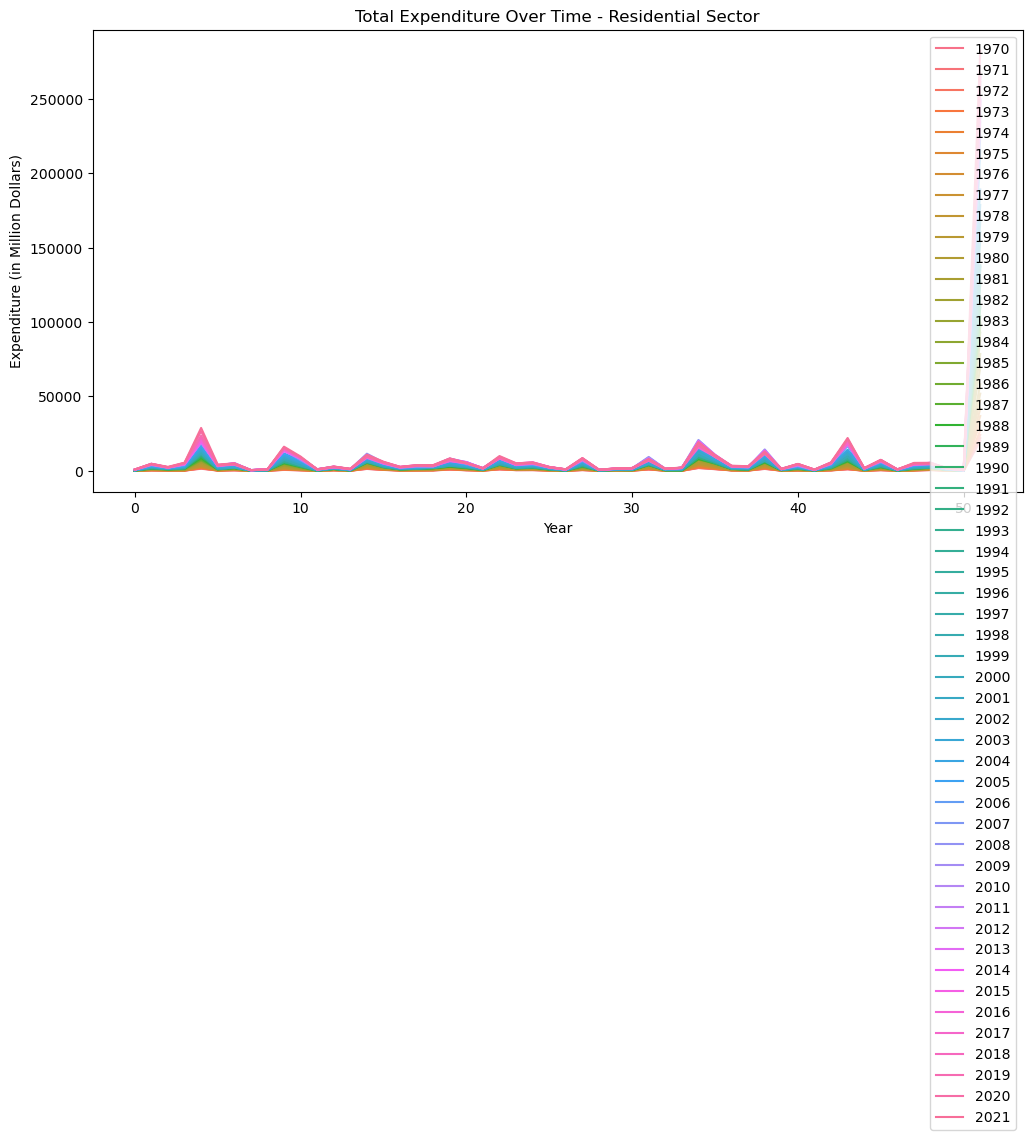

/Users/sibivishtan/anaconda3/envs/ds4200/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/sibivishtan/anaconda3/envs/ds4200/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/sibivishtan/anaconda3/envs/ds4200/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/sibivishtan/anaconda3/envs/ds4200/lib/python3.11/site-pa

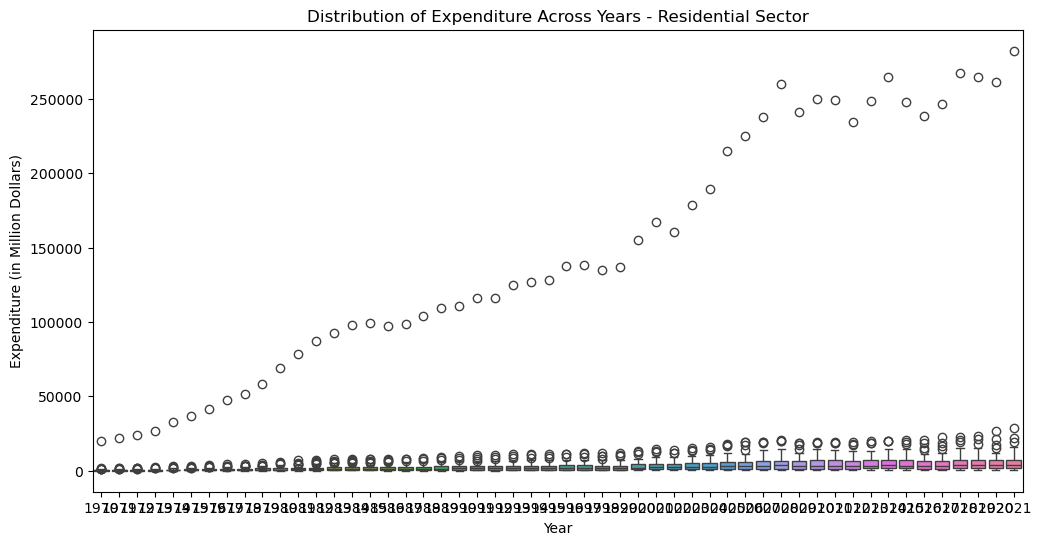

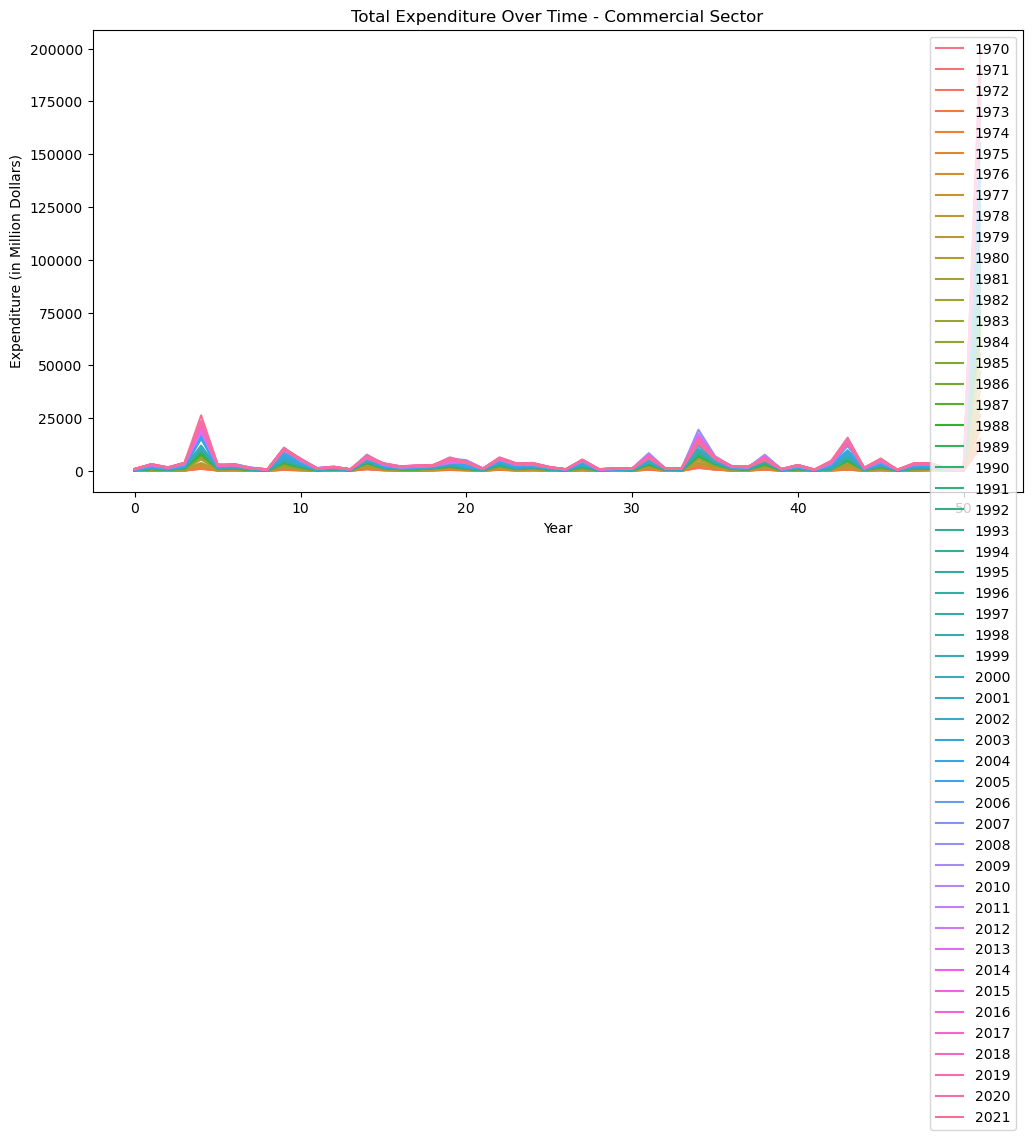

/Users/sibivishtan/anaconda3/envs/ds4200/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/sibivishtan/anaconda3/envs/ds4200/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/sibivishtan/anaconda3/envs/ds4200/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/sibivishtan/anaconda3/envs/ds4200/lib/python3.11/site-pa

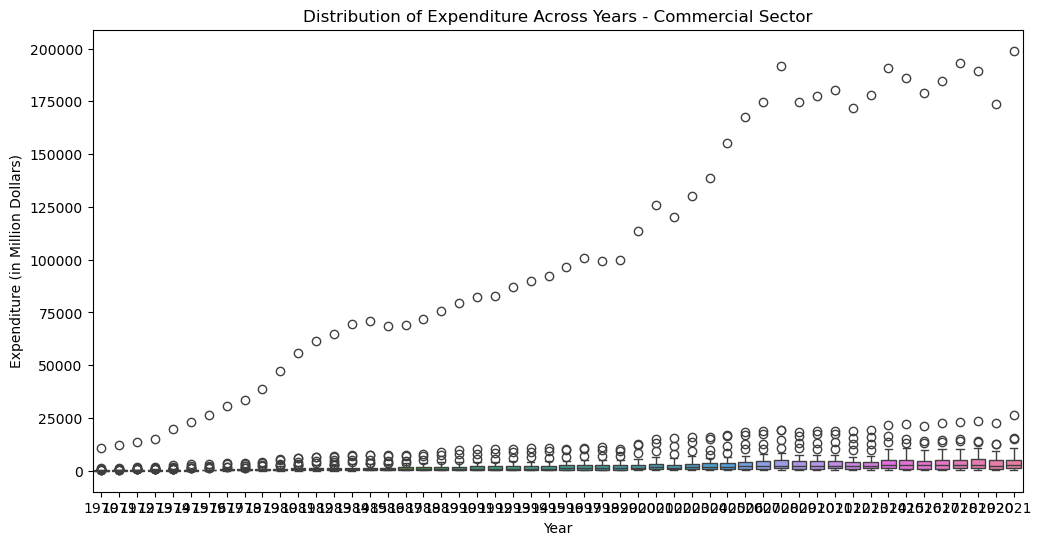

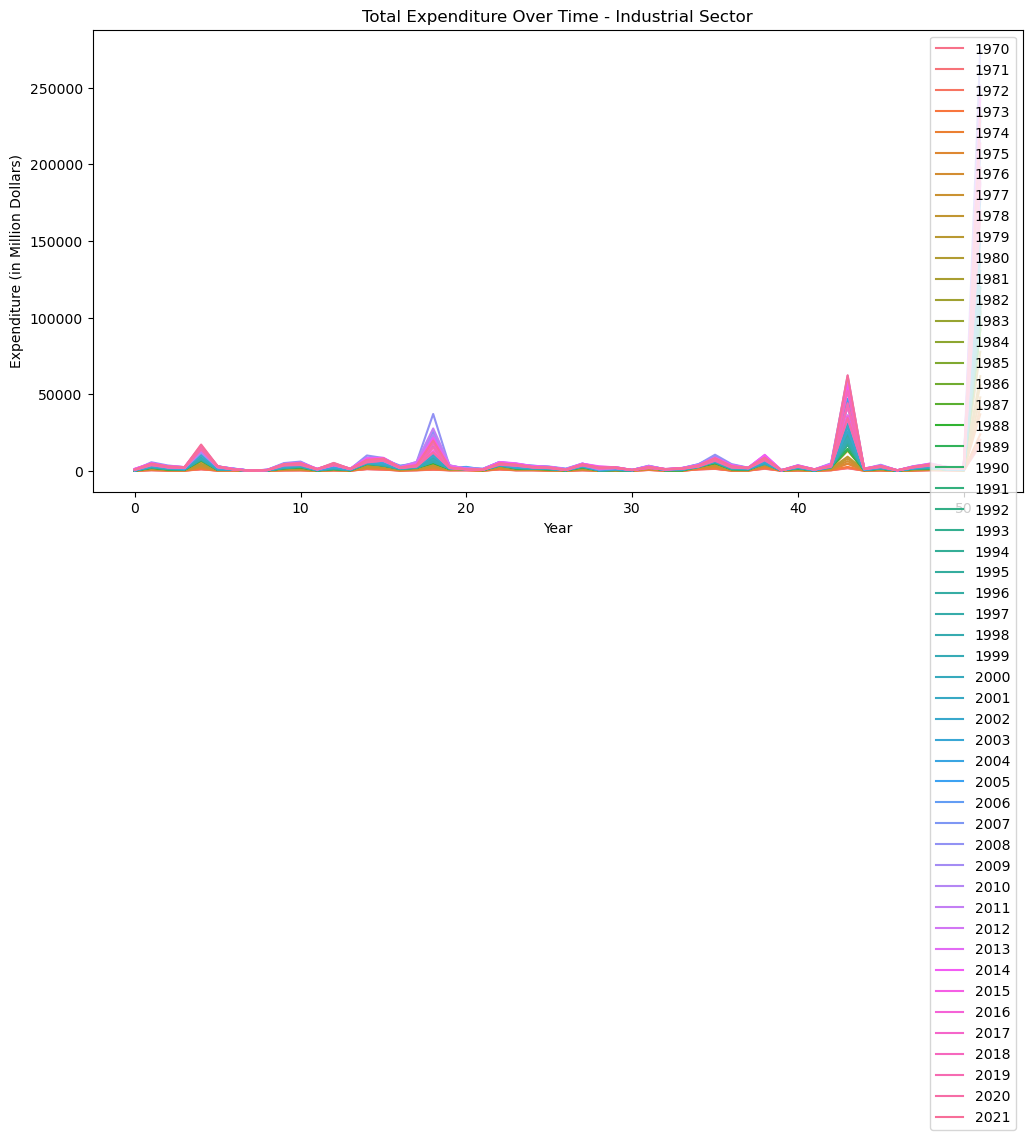

/Users/sibivishtan/anaconda3/envs/ds4200/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/sibivishtan/anaconda3/envs/ds4200/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/sibivishtan/anaconda3/envs/ds4200/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/sibivishtan/anaconda3/envs/ds4200/lib/python3.11/site-pa

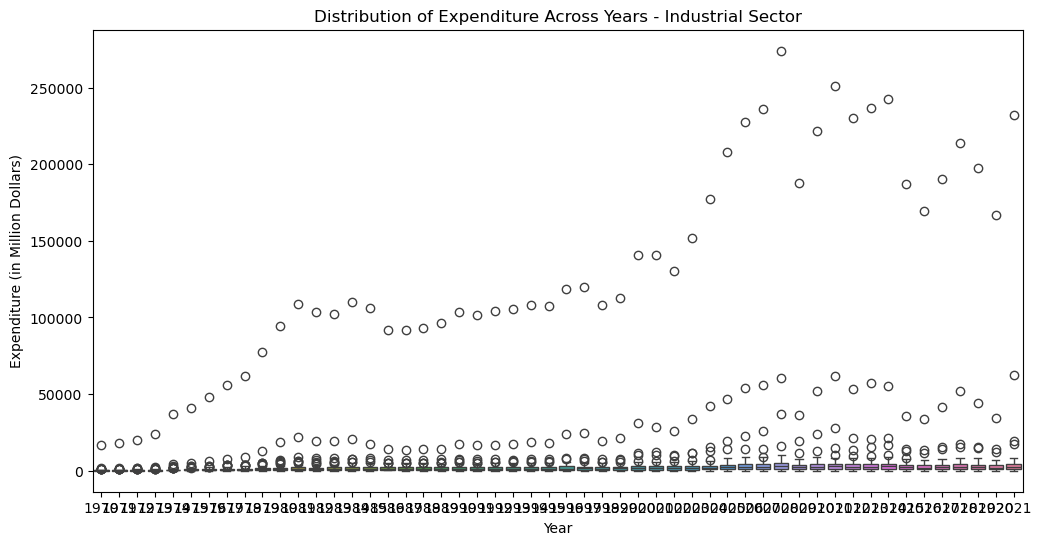

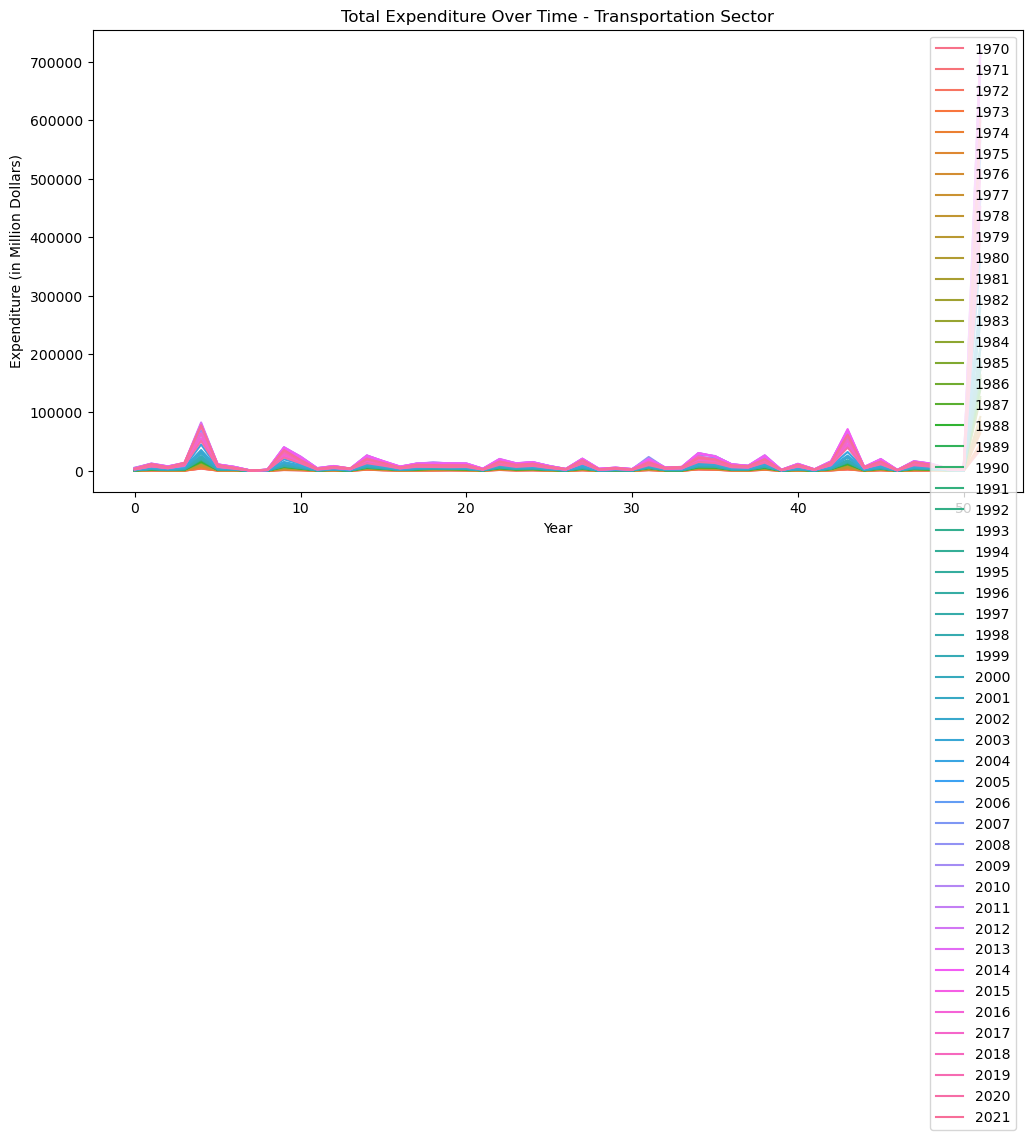

/Users/sibivishtan/anaconda3/envs/ds4200/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/sibivishtan/anaconda3/envs/ds4200/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/sibivishtan/anaconda3/envs/ds4200/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/sibivishtan/anaconda3/envs/ds4200/lib/python3.11/site-pa

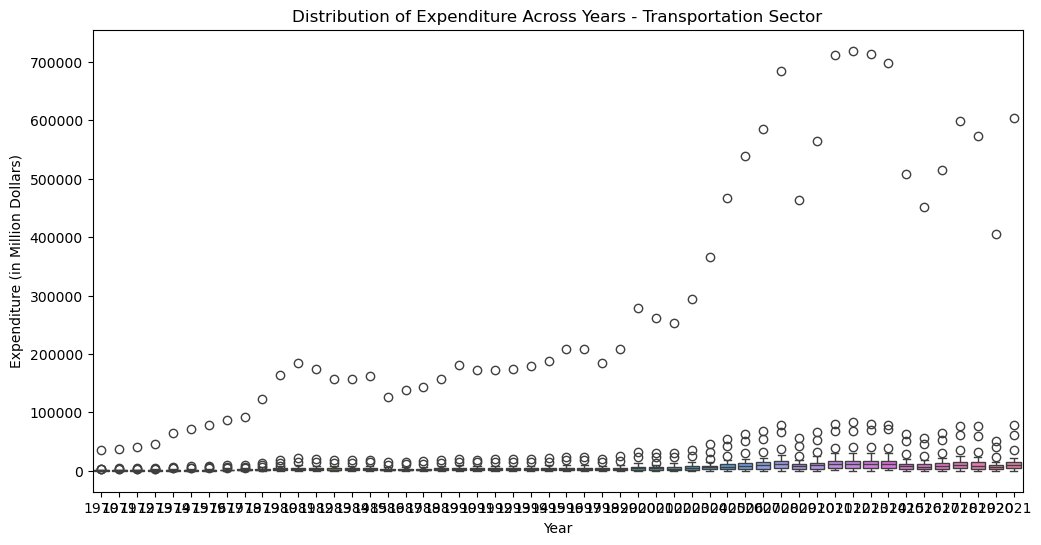

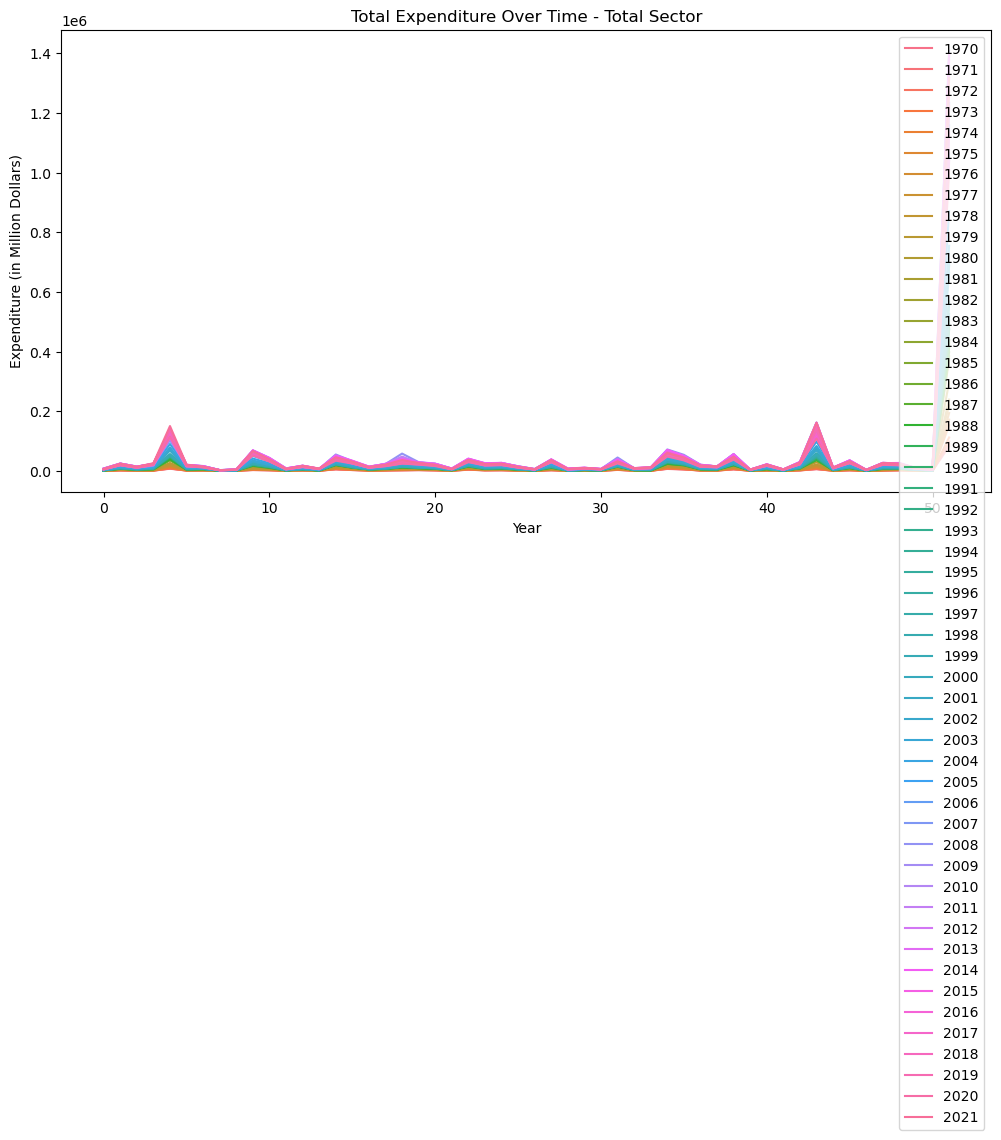

/Users/sibivishtan/anaconda3/envs/ds4200/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/sibivishtan/anaconda3/envs/ds4200/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/sibivishtan/anaconda3/envs/ds4200/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/sibivishtan/anaconda3/envs/ds4200/lib/python3.11/site-pa

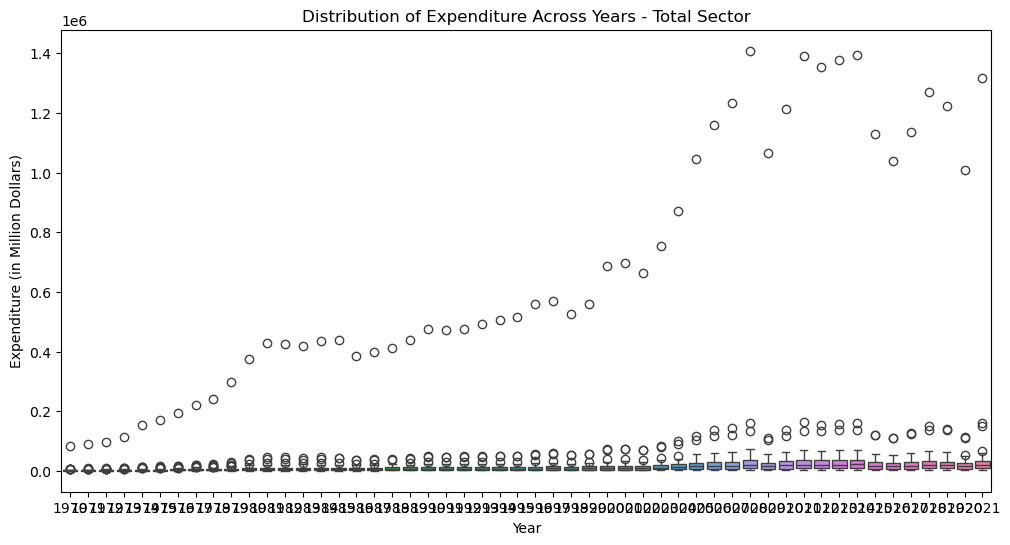

In [14]:
# Define a function for EDA
def perform_eda(df, sector_name):
    # Line Plot
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, dashes=False)
    plt.title(f'Total Expenditure Over Time - {sector_name} Sector')
    plt.xlabel('Year')
    plt.ylabel('Expenditure (in Million Dollars)')
    plt.show()
    
    # Box Plot
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df)
    plt.title(f'Distribution of Expenditure Across Years - {sector_name} Sector')
    plt.xlabel('Year')
    plt.ylabel('Expenditure (in Million Dollars)')
    plt.show()

# Perform EDA for each sector
perform_eda(res_expend_tot, 'Residential')
perform_eda(com_expend_tot, 'Commercial')
perform_eda(industrial_expend_tot, 'Industrial')
perform_eda(transport_expend_tot, 'Transportation')
perform_eda(total_expend_tot, 'Total')

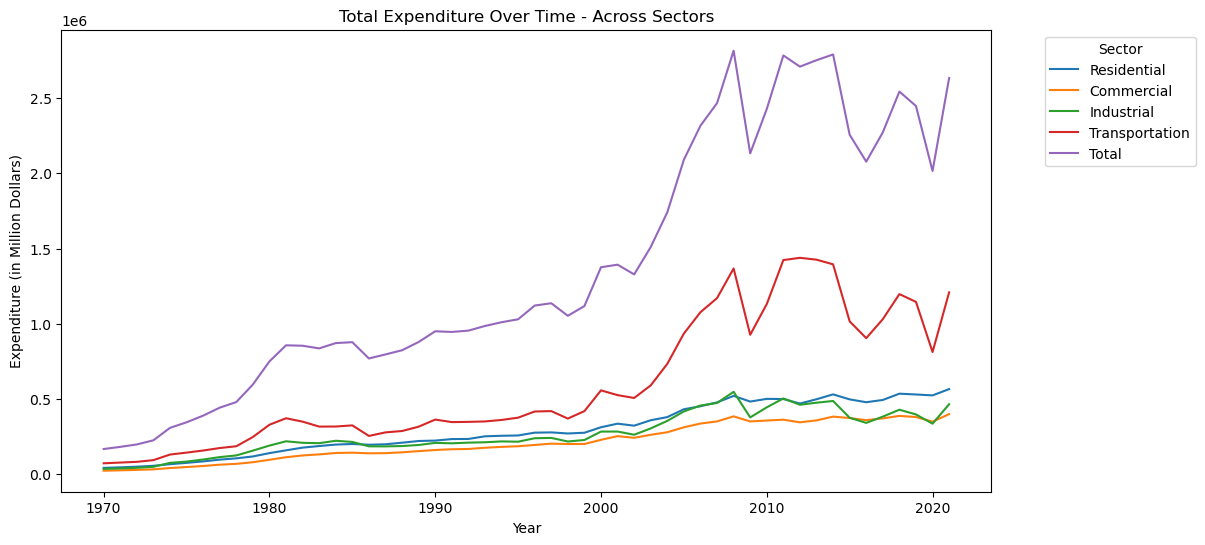

In [20]:
# Extract only the numerical columns (expenditure columns) from each DataFrame
res_expend_columns = res_expend_tot.columns[1:]
com_expend_columns = com_expend_tot.columns[1:]
industrial_expend_columns = industrial_expend_tot.columns[1:]
transport_expend_columns = transport_expend_tot.columns[1:]
total_expend_columns = total_expend_tot.columns[1:]

# Combine data for comparison
combined_df = pd.concat({'Residential': res_expend_tot[res_expend_columns].sum(axis=0),
                         'Commercial': com_expend_tot[com_expend_columns].sum(axis=0),
                         'Industrial': industrial_expend_tot[industrial_expend_columns].sum(axis=0),
                         'Transportation': transport_expend_tot[transport_expend_columns].sum(axis=0),
                         'Total': total_expend_tot[total_expend_columns].sum(axis=0)}, axis=1)

# Plot comparison
plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_df, dashes=False)
plt.title('Total Expenditure Over Time - Across Sectors')
plt.xlabel('Year')
plt.ylabel('Expenditure (in Million Dollars)')
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

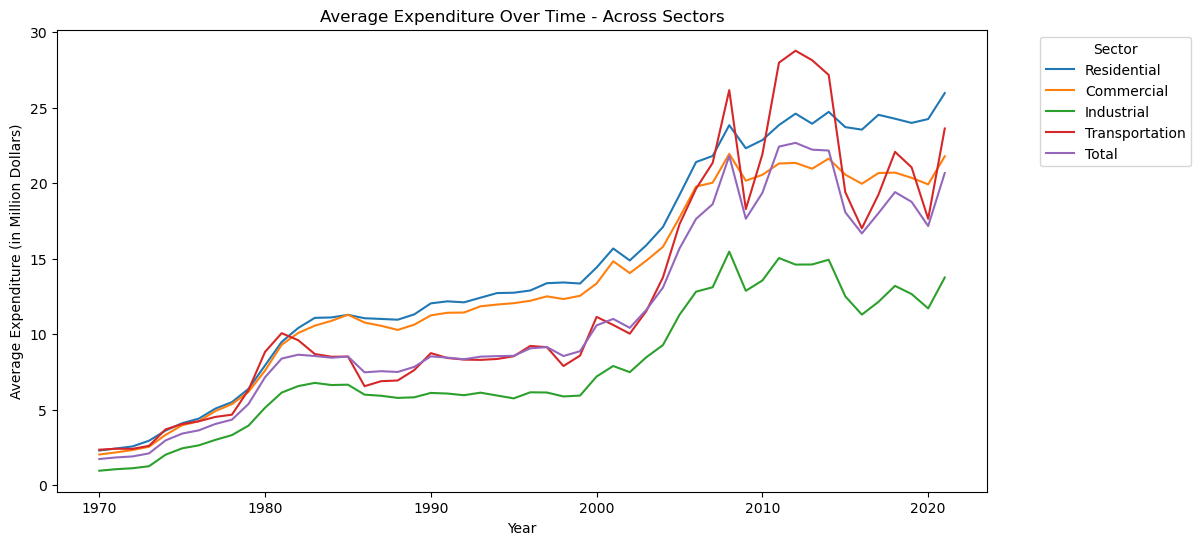

In [21]:
# Extract columns representing years
years = total_pr_avg_tot.columns[1:]

# Combine data for comparison
combined_df = pd.concat({'Residential': resi_pr_avg_tot.set_index('State').mean(axis=0),
                         'Commercial': com_pr_avg_tot.set_index('State').mean(axis=0),
                         'Industrial': industrial_pr_avg_tot.set_index('State').mean(axis=0),
                         'Transportation': transport_pr_avg_tot.set_index('State').mean(axis=0),
                         'Total': total_pr_avg_tot.set_index('State').mean(axis=0)}, axis=1)

# Plot comparison
plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_df, dashes=False)
plt.title('Average Expenditure Over Time - Across Sectors')
plt.xlabel('Year')
plt.ylabel('Average Expenditure (in Million Dollars)')
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

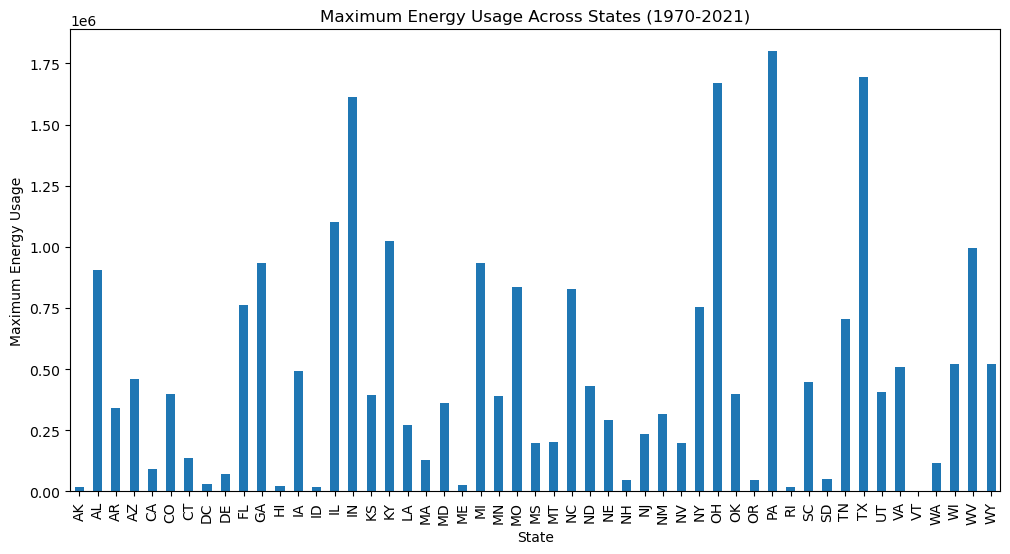

In [29]:
# Load the dataset
use_energy_source = pd.read_excel('use_energy_source.xlsx', sheet_name='Coal', header=2)

# Exclude the last row (assuming it corresponds to the 'Total' row)
use_energy_source = use_energy_source.iloc[:-1]

# Set the 'State' column as the index temporarily for easier computation
use_energy_source.set_index('State', inplace=True)

# Compute the maximum energy usage across years for each state
max_energy_usage = use_energy_source.max(axis=1)

# Plot the bar plot
plt.figure(figsize=(12, 6))
max_energy_usage.plot(kind='bar')
plt.title('Maximum Energy Usage Across States (1970-2021)')
plt.xlabel('State')
plt.ylabel('Maximum Energy Usage')
plt.xticks(rotation=90)  # Rotate the state labels for better readability
plt.show()

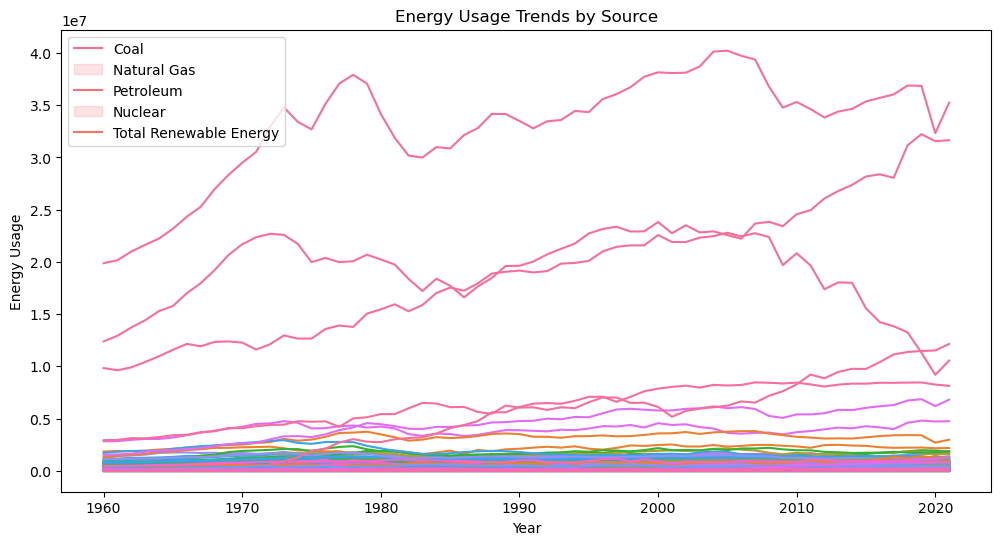

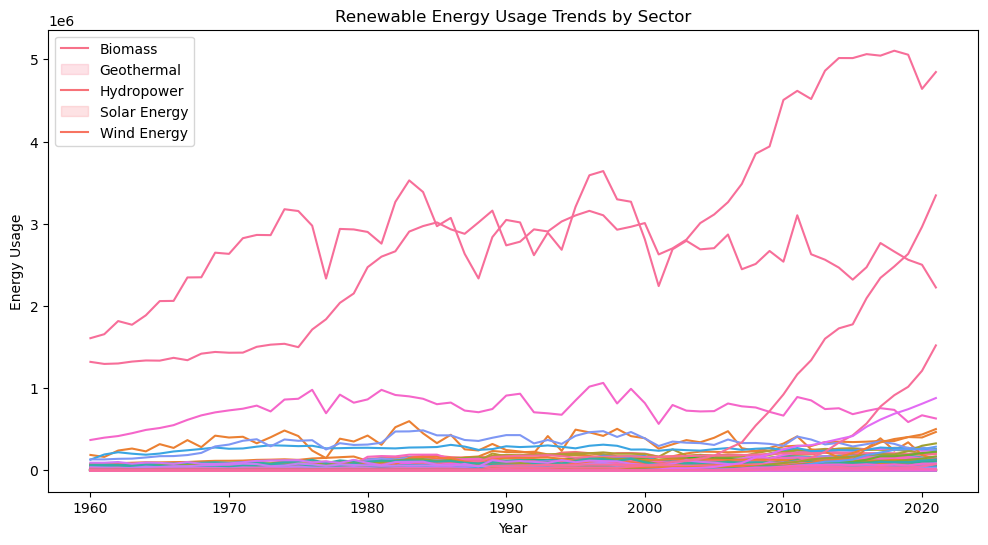

In [30]:
# Plot comparison for energy sources
plt.figure(figsize=(12, 6))
sns.lineplot(data=coal_use_energy_source.drop(columns='State').T, dashes=False)
sns.lineplot(data=natural_gas_use_energy_source.drop(columns='State').T, dashes=False)
sns.lineplot(data=petroleum_use_energy_source.drop(columns='State').T, dashes=False)
sns.lineplot(data=nuclear_use_energy_source.drop(columns='State').T, dashes=False)
sns.lineplot(data=total_renewable_use_energy_source.drop(columns='State').T, dashes=False)
plt.title('Energy Usage Trends by Source')
plt.xlabel('Year')
plt.ylabel('Energy Usage')
plt.legend(labels=['Coal', 'Natural Gas', 'Petroleum', 'Nuclear', 'Total Renewable Energy'])
plt.show()

# Plot comparison for renewable sectors
plt.figure(figsize=(12, 6))
sns.lineplot(data=biomass_use_renew_sector.drop(columns='State').T, dashes=False)
sns.lineplot(data=geothermal_use_renew_sector.drop(columns='State').T, dashes=False)
sns.lineplot(data=hydro_use_renew_sector.drop(columns='State').T, dashes=False)
sns.lineplot(data=solar_use_renew_sector.drop(columns='State').T, dashes=False)
sns.lineplot(data=wind_use_renew_sector.drop(columns='State').T, dashes=False)
plt.title('Renewable Energy Usage Trends by Sector')
plt.xlabel('Year')
plt.ylabel('Energy Usage')
plt.legend(labels=['Biomass', 'Geothermal', 'Hydropower', 'Solar Energy', 'Wind Energy'])
plt.show()

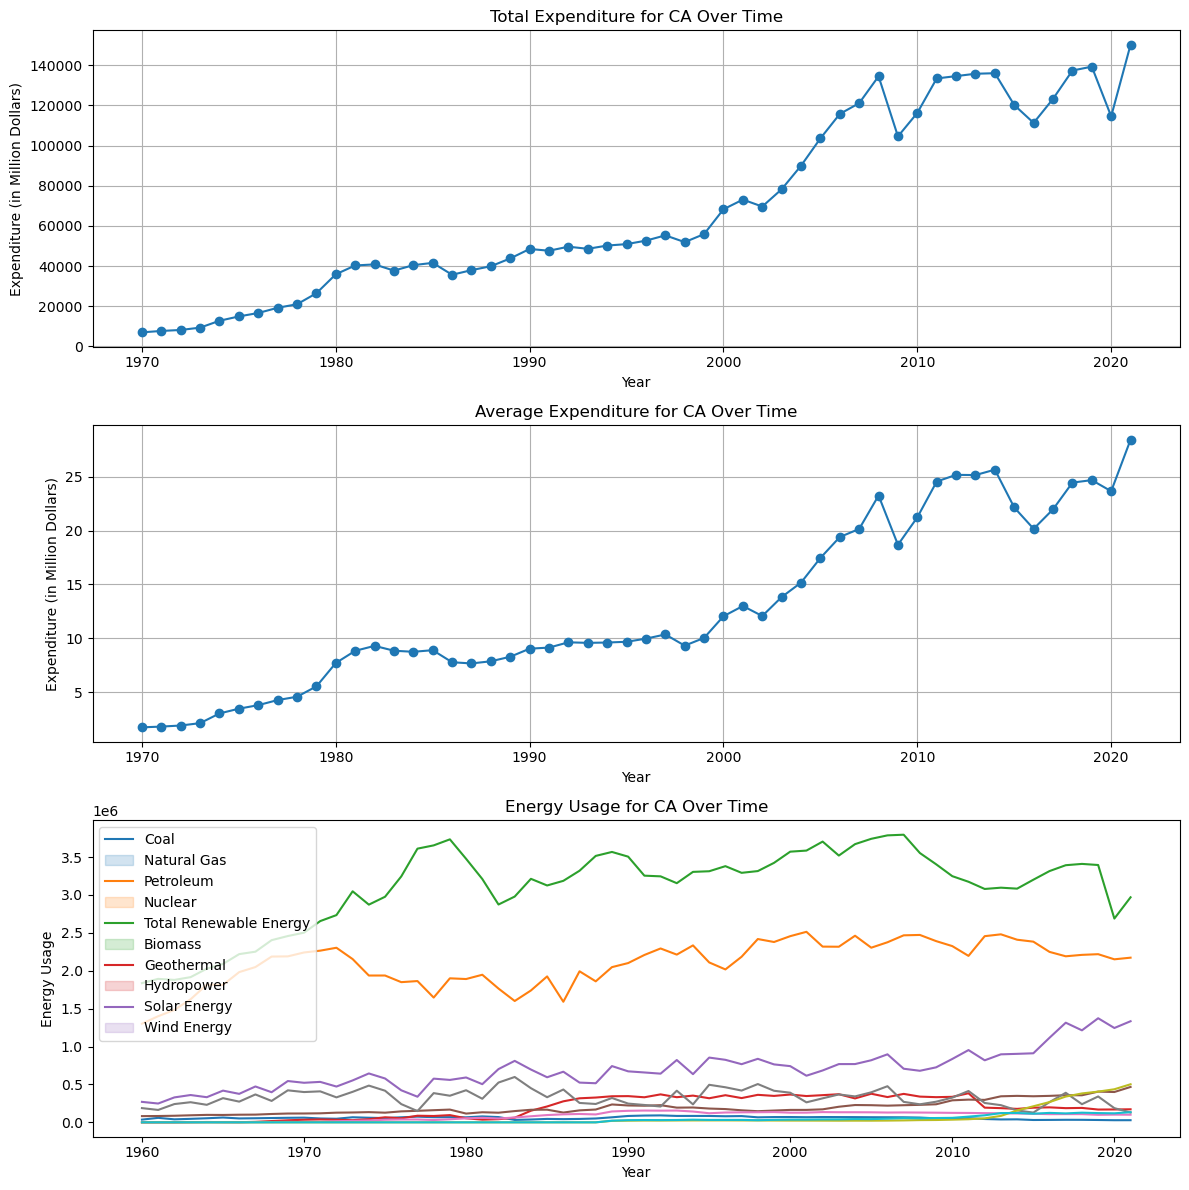

In [33]:
def state_comparison(state):
    # Load total expenditure data
    total_expenditure = pd.read_excel('expend_tot.xlsx', sheet_name='Total', header=2)
    
    # Load average expenditure data
    average_expenditure = pd.read_excel('pr_avg_tot.xlsx', sheet_name='Total', header=2)
    
    # Load energy usage data
    coal_use_energy_source = pd.read_excel('use_energy_source.xlsx', sheet_name='Coal', header=2)
    natural_gas_use_energy_source = pd.read_excel('use_energy_source.xlsx', sheet_name='Natural Gas', header=2)
    petroleum_use_energy_source = pd.read_excel('use_energy_source.xlsx', sheet_name='Petroleum', header=2)
    nuclear_use_energy_source = pd.read_excel('use_energy_source.xlsx', sheet_name='Nuclear', header=2)
    total_renewable_use_energy_source = pd.read_excel('use_energy_source.xlsx', sheet_name='Total Renewable Energy', header=2)
    
    # Load renewable energy sector data
    biomass_use_renew_sector = pd.read_excel('use_renew_sector.xlsx', sheet_name='Biomass', header=2)
    geothermal_use_renew_sector = pd.read_excel('use_renew_sector.xlsx', sheet_name='Geothermal', header=2)
    hydro_use_renew_sector = pd.read_excel('use_renew_sector.xlsx', sheet_name='Hydropower', header=2)
    solar_use_renew_sector = pd.read_excel('use_renew_sector.xlsx', sheet_name='Solar Energy', header=2)
    wind_use_renew_sector = pd.read_excel('use_renew_sector.xlsx', sheet_name='Wind Energy', header=2)
    
    # Filter data for the given state
    total_expenditure_state = total_expenditure[total_expenditure['State'] == state].drop(columns='State').squeeze()
    average_expenditure_state = average_expenditure[average_expenditure['State'] == state].drop(columns='State').squeeze()
    
    # Filter energy usage data for the given state
    coal_usage_state = coal_use_energy_source[coal_use_energy_source['State'] == state].drop(columns='State').squeeze()
    natural_gas_usage_state = natural_gas_use_energy_source[natural_gas_use_energy_source['State'] == state].drop(columns='State').squeeze()
    petroleum_usage_state = petroleum_use_energy_source[petroleum_use_energy_source['State'] == state].drop(columns='State').squeeze()
    nuclear_usage_state = nuclear_use_energy_source[nuclear_use_energy_source['State'] == state].drop(columns='State').squeeze()
    total_renewable_usage_state = total_renewable_use_energy_source[total_renewable_use_energy_source['State'] == state].drop(columns='State').squeeze()
    
    # Filter renewable energy sector data for the given state
    biomass_usage_state = biomass_use_renew_sector[biomass_use_renew_sector['State'] == state].drop(columns='State').squeeze()
    geothermal_usage_state = geothermal_use_renew_sector[geothermal_use_renew_sector['State'] == state].drop(columns='State').squeeze()
    hydro_usage_state = hydro_use_renew_sector[hydro_use_renew_sector['State'] == state].drop(columns='State').squeeze()
    solar_usage_state = solar_use_renew_sector[solar_use_renew_sector['State'] == state].drop(columns='State').squeeze()
    wind_usage_state = wind_use_renew_sector[wind_use_renew_sector['State'] == state].drop(columns='State').squeeze()
    
    # Plot total expenditure, average expenditure, and energy usage for the given state
    plt.figure(figsize=(12, 12))
    
    # Total expenditure
    plt.subplot(3, 1, 1)
    total_expenditure_state.plot(marker='o', linestyle='-')
    plt.title(f'Total Expenditure for {state} Over Time')
    plt.xlabel('Year')
    plt.ylabel('Expenditure (in Million Dollars)')
    plt.grid(True)
    
    # Average expenditure
    plt.subplot(3, 1, 2)
    average_expenditure_state.plot(marker='o', linestyle='-')
    plt.title(f'Average Expenditure for {state} Over Time')
    plt.xlabel('Year')
    plt.ylabel('Expenditure (in Million Dollars)')
    plt.grid(True)
    
    # Energy usage
    plt.subplot(3, 1, 3)
    sns.lineplot(data=coal_usage_state, dashes=False)
    sns.lineplot(data=natural_gas_usage_state, dashes=False)
    sns.lineplot(data=petroleum_usage_state, dashes=False)
    sns.lineplot(data=nuclear_usage_state, dashes=False)
    sns.lineplot(data=total_renewable_usage_state, dashes=False)
    sns.lineplot(data=biomass_usage_state, dashes=False)
    sns.lineplot(data=geothermal_usage_state, dashes=False)
    sns.lineplot(data=hydro_usage_state, dashes=False)
    sns.lineplot(data=solar_usage_state, dashes=False)
    sns.lineplot(data=wind_usage_state, dashes=False)
    plt.title(f'Energy Usage for {state} Over Time')
    plt.xlabel('Year')
    plt.ylabel('Energy Usage')
    plt.legend(labels=['Coal', 'Natural Gas', 'Petroleum', 'Nuclear', 'Total Renewable Energy', 'Biomass', 'Geothermal', 'Hydropower', 'Solar Energy', 'Wind Energy'], loc='upper left')
    
    plt.tight_layout()
    plt.show()

# Example usage:
state_comparison('CA')

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def build_lr_model(state):
    # Load the relevant datasets
    total_expenditure = pd.read_excel('expend_tot.xlsx', sheet_name='Total', header=2)
    total_renewable_use_energy_source = pd.read_excel('use_energy_source.xlsx', sheet_name='Total Renewable Energy', header=2)
    
    # Filter data for the given state
    total_expenditure_state = total_expenditure[total_expenditure['State'] == state].drop(columns='State').squeeze()
    total_renewable_usage_state = total_renewable_use_energy_source[total_renewable_use_energy_source['State'] == state].drop(columns='State').squeeze()
    
    # Merge the datasets
    merged_data = pd.concat([total_expenditure_state, total_renewable_usage_state], axis=1)
    merged_data.columns = ['Total_Expenditure', 'Total_Renewable_Usage']
    
    # Drop rows with missing values
    merged_data.dropna(inplace=True)
    
    # Split the data into features (X) and target variable (y)
    X = merged_data[['Total_Expenditure']]
    y = merged_data['Total_Renewable_Usage']
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize and train the Linear Regression model
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred = lr_model.predict(X_test)
    
    # Return the trained model
    return lr_model

# Example usage:
lr_model = build_lr_model('CA')


In [44]:
def predict_renewable_usage(state, expenditure):
    # Load the relevant datasets
    total_expenditure = pd.read_excel('expend_tot.xlsx', sheet_name='Total', header=2)
    total_renewable_use_energy_source = pd.read_excel('use_energy_source.xlsx', sheet_name='Total Renewable Energy', header=2)
    
    # Filter data for the given state
    total_expenditure_state = total_expenditure[total_expenditure['State'] == state].drop(columns='State').squeeze()
    total_renewable_usage_state = total_renewable_use_energy_source[total_renewable_use_energy_source['State'] == state].drop(columns='State').squeeze()
    
    # Merge the datasets
    merged_data = pd.concat([total_expenditure_state, total_renewable_usage_state], axis=1)
    merged_data.columns = ['Total_Expenditure', 'Total_Renewable_Usage']
    
    # Drop rows with missing values
    merged_data.dropna(inplace=True)
    
    # Split the data into features (X) and target variable (y)
    X = merged_data[['Total_Expenditure']]
    y = merged_data['Total_Renewable_Usage']
    
    # Initialize and train the Linear Regression model
    lr_model = LinearRegression()
    lr_model.fit(X, y)
    
    # Make a prediction based on the given expenditure
    predicted_renewable_usage = lr_model.predict([[expenditure]])[0]
    
    return predicted_renewable_usage
# Example usage:
predicted_renewable_usage = predict_renewable_usage('CA', 10000)
print(f'Predicted Renewable Energy Usage: {predicted_renewable_usage}')

Predicted Renewable Energy Usage: 520184.0621932016


/Users/sibivishtan/anaconda3/envs/ds4200/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [49]:
# decision tree
from sklearn.tree import DecisionTreeRegressor
def build_dt_model(state):
    # Load the relevant datasets
    total_expenditure = pd.read_excel('expend_tot.xlsx', sheet_name='Total', header=2)
    total_renewable_use_energy_source = pd.read_excel('use_energy_source.xlsx', sheet_name='Total Renewable Energy', header=2)
    
    # Filter data for the given state
    total_expenditure_state = total_expenditure[total_expenditure['State'] == state].drop(columns='State').squeeze()
    total_renewable_usage_state = total_renewable_use_energy_source[total_renewable_use_energy_source['State'] == state].drop(columns='State').squeeze()
    
    # Merge the datasets
    merged_data = pd.concat([total_expenditure_state, total_renewable_usage_state], axis=1)
    merged_data.columns = ['Total_Expenditure', 'Total_Renewable_Usage']
    
    # Drop rows with missing values
    merged_data.dropna(inplace=True)
    
    # Split the data into features (X) and target variable (y)
    X = merged_data[['Total_Expenditure']]
    y = merged_data['Total_Renewable_Usage']
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize and train the Decision Tree model
    dt_model = DecisionTreeRegressor(random_state=42)
    dt_model.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred = dt_model.predict(X_test)
    
    # Return the trained model
    return dt_model

In [51]:
# Make predictions on new data
def predict_renewable_usage_dt(state, expenditure):
    # Load the relevant datasets
    total_expenditure = pd.read_excel('expend_tot.xlsx', sheet_name='Total', header=2)
    total_renewable_use_energy_source = pd.read_excel('use_energy_source.xlsx', sheet_name='Total Renewable Energy', header=2)
    
    # Filter data for the given state
    total_expenditure_state = total_expenditure[total_expenditure['State'] == state].drop(columns='State').squeeze()
    total_renewable_usage_state = total_renewable_use_energy_source[total_renewable_use_energy_source['State'] == state].drop(columns='State').squeeze()
    
    # Merge the datasets
    merged_data = pd.concat([total_expenditure_state, total_renewable_usage_state], axis=1)
    merged_data.columns = ['Total_Expenditure', 'Total_Renewable_Usage']
    
    # Drop rows with missing values
    merged_data.dropna(inplace=True)
    
    # Split the data into features (X) and target variable (y)
    X = merged_data[['Total_Expenditure']]
    y = merged_data['Total_Renewable_Usage']
    
    # Initialize and train the Decision Tree model
    dt_model = DecisionTreeRegressor(random_state=42)
    dt_model.fit(X, y)
    
    # Make a prediction based on the given expenditure
    predicted_renewable_usage = dt_model.predict([[expenditure]])[0]
    
    return predicted_renewable_usage
# Example usage:
predicted_renewable_usage = predict_renewable_usage_dt('CA', 100000)
print(f'Predicted Renewable Energy Usage: {predicted_renewable_usage}')

Predicted Renewable Energy Usage: 819440.0


/Users/sibivishtan/anaconda3/envs/ds4200/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [47]:
# SVM
from sklearn.svm import SVR
def build_svm_model(state):
    # Load the relevant datasets
    total_expenditure = pd.read_excel('expend_tot.xlsx', sheet_name='Total', header=2)
    total_renewable_use_energy_source = pd.read_excel('use_energy_source.xlsx', sheet_name='Total Renewable Energy', header=2)
    
    # Filter data for the given state
    total_expenditure_state = total_expenditure[total_expenditure['State'] == state].drop(columns='State').squeeze()
    total_renewable_usage_state = total_renewable_use_energy_source[total_renewable_use_energy_source['State'] == state].drop(columns='State').squeeze()
    
    # Merge the datasets
    merged_data = pd.concat([total_expenditure_state, total_renewable_usage_state], axis=1)
    merged_data.columns = ['Total_Expenditure', 'Total_Renewable_Usage']
    
    # Drop rows with missing values
    merged_data.dropna(inplace=True)
    
    # Split the data into features (X) and target variable (y)
    X = merged_data[['Total_Expenditure']]
    y = merged_data['Total_Renewable_Usage']
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize and train the SVM model
    svm_model = SVR(kernel='linear')
    svm_model.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred = svm_model.predict(X_test)
    
    # Return the trained model
    return svm_model

In [50]:
def predict_renewable_usage_svm(state, expenditure):
    # Load the relevant datasets
    total_expenditure = pd.read_excel('expend_tot.xlsx', sheet_name='Total', header=2)
    total_renewable_use_energy_source = pd.read_excel('use_energy_source.xlsx', sheet_name='Total Renewable Energy', header=2)
    
    # Filter data for the given state
    total_expenditure_state = total_expenditure[total_expenditure['State'] == state].drop(columns='State').squeeze()
    total_renewable_usage_state = total_renewable_use_energy_source[total_renewable_use_energy_source['State'] == state].drop(columns='State').squeeze()
    
    # Merge the datasets
    merged_data = pd.concat([total_expenditure_state, total_renewable_usage_state], axis=1)
    merged_data.columns = ['Total_Expenditure', 'Total_Renewable_Usage']
    
    # Drop rows with missing values
    merged_data.dropna(inplace=True)
    
    # Split the data into features (X) and target variable (y)
    X = merged_data[['Total_Expenditure']]
    y = merged_data['Total_Renewable_Usage']
    
    # Initialize and train the SVM model
    svm_model = SVR(kernel='linear')
    svm_model.fit(X, y)
    
    # Make a prediction based on the given expenditure
    predicted_renewable_usage = svm_model.predict([[expenditure]])[0]
    
    return predicted_renewable_usage
# Example usage:
predicted_renewable_usage = predict_renewable_usage_svm('CA', 100000)
print(f'Predicted Renewable Energy Usage: {predicted_renewable_usage}')

Predicted Renewable Energy Usage: 840688.6502019868


/Users/sibivishtan/anaconda3/envs/ds4200/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
